In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/flower-color-images/FlowerColorImages.h5
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0021.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0084.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0166.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0077.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0139.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0183.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0130.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0167.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0064.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0030.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0091.png
/kaggle/input/flower-color-images/flower_im

In [2]:
flowers=pd.read_csv('../input/flower-color-images/flower_images/flower_images/flower_labels.csv')
flowers_images=flowers['file']
flowers_label=flowers['label'].values

In [3]:
print(flowers_images.shape[0])
#flowers_images=flowers_images.reshape(210,3)


210


In [4]:
print(flowers_label.shape)

(210,)


5


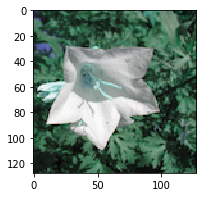

In [5]:
import cv2
from matplotlib import pyplot as plt
x=np.random.randint(210)
image=cv2.imread('../input/flower-color-images/flower_images/flower_images/'+flowers_images[x])
plt.figure(figsize=(3,3))
plt.imshow(image)
print(flowers_label[x])


In [6]:
import keras
from tqdm import tqdm
from keras.preprocessing import image as keras_image
def path_to_tensor(img_path):
    img=keras_image.load_img('../input/flower-color-images/flower_images/flower_images/'+img_path,target_size=(28,28))
    x=keras_image.img_to_array(img)
    return np.expand_dims(x,axis=0)

def paths_to_tensors(img_paths):
    list_of_tensors=[path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

Using TensorFlow backend.


In [7]:
flowers_tensors=paths_to_tensors(flowers_images)

100%|██████████| 210/210 [00:00<00:00, 260.33it/s]


In [8]:
from sklearn.model_selection import train_test_split



In [9]:
x_train,x_test,y_train,y_test=train_test_split(flowers_tensors,flowers_label,test_size=0.2,random_state=1)

In [10]:
[x_train.shape,y_train.shape,x_test.shape,y_test.shape]

[(168, 28, 28, 3), (168,), (42, 28, 28, 3), (42,)]

In [11]:
img_rows=28
img_cols=28
input_shape=(img_rows,img_cols,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [12]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [13]:
y_train.shape

(168, 10)

In [14]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import BatchNormalization
from keras.models import Model, Sequential, load_model
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
num_classes=10
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='same',input_shape=input_shape,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)      

In [16]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [18]:
callbacks=[earlystopping]
history=model.fit(x_train,y_train,epochs=25,batch_size=32,validation_data=(x_test,y_test))

Train on 168 samples, validate on 42 samples
Epoch 1/25
168/168 [==============================] - 3s 19ms/step - loss: 3.3632 - accuracy: 0.1607 - val_loss: 2.3152 - val_accuracy: 0.0714
Epoch 2/25
168/168 [==============================] - 0s 578us/step - loss: 2.5219 - accuracy: 0.2857 - val_loss: 2.3841 - val_accuracy: 0.0714
Epoch 3/25
168/168 [==============================] - 0s 567us/step - loss: 2.0996 - accuracy: 0.3452 - val_loss: 2.4687 - val_accuracy: 0.0714
Epoch 4/25
168/168 [==============================] - 0s 562us/step - loss: 2.0406 - accuracy: 0.3571 - val_loss: 2.5726 - val_accuracy: 0.0714
Epoch 5/25
168/168 [==============================] - 0s 616us/step - loss: 1.7683 - accuracy: 0.5000 - val_loss: 2.6799 - val_accuracy: 0.0714
Epoch 6/25
168/168 [==============================] - 0s 790us/step - loss: 1.6025 - accuracy: 0.4226 - val_loss: 2.8018 - val_accuracy: 0.0714
Epoch 7/25
168/168 [==============================] - 0s 676us/step - loss: 1.5530 - accurac

In [19]:
score=model.evaluate(x_test,y_test,verbose=0)
print("LOSS : ", score[0])
print("ACCURACY : ", score[1])

LOSS :  4.712393397376651
ACCURACY :  0.1190476194024086


In [20]:
data_generator = keras_image.ImageDataGenerator(shear_range=0.2, 
                                                zoom_range=0.3,
                                                rotation_range=30,
                                                width_shift_range=20,
                                                height_shift_range=20,
                                                horizontal_flip=True)
cnn_history =model.fit_generator(data_generator.flow(x_train, y_train, batch_size=32),
                                               steps_per_epoch=189, epochs=10, callbacks=callbacks,
                                               validation_data=(x_test, y_test))

Epoch 1/10
189/189 [==============================] - 6s 34ms/step - loss: 2.0765 - accuracy: 0.3903 - val_loss: 4.0627 - val_accuracy: 0.0714
Epoch 2/10
189/189 [==============================] - 6s 33ms/step - loss: 1.6047 - accuracy: 0.4691 - val_loss: 2.2452 - val_accuracy: 0.3810
Epoch 3/10
189/189 [==============================] - 6s 34ms/step - loss: 1.3741 - accuracy: 0.5428 - val_loss: 1.3476 - val_accuracy: 0.6905
Epoch 4/10
189/189 [==============================] - 6s 33ms/step - loss: 1.1903 - accuracy: 0.6027 - val_loss: 2.2272 - val_accuracy: 0.5238
Epoch 5/10
189/189 [==============================] - 6s 34ms/step - loss: 1.1618 - accuracy: 0.6233 - val_loss: 1.8424 - val_accuracy: 0.5952
Epoch 6/10
189/189 [==============================] - 6s 33ms/step - loss: 1.0339 - accuracy: 0.6580 - val_loss: 1.4723 - val_accuracy: 0.6667
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping


In [21]:
score=model.evaluate(x_test,y_test,verbose=0)
print("LOSS : ", score[0])
print("ACCURACY : ", score[1])

LOSS :  1.347646435101827
ACCURACY :  0.6904761791229248


In [22]:
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)


In [23]:
y_pred

array([1, 6, 4, 4, 8, 4, 4, 6, 6, 9, 5, 1, 3, 6, 8, 3, 8, 3, 2, 6, 5, 6,
       5, 4, 9, 2, 8, 7, 1, 1, 2, 4, 6, 6, 6, 3, 1, 6, 5, 4, 7, 8])

In [24]:
submission=pd.DataFrame({'Label' : y_pred})
submission.head()

,Label
0,1
1,6
2,4
3,4
4,8


In [25]:
filename = 'Flower Color Classifier.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Flower Color Classifier.csv
